# Comparison of computation speeds between homogenous density tesseroid with variable density tesseroid

**Import Packages**

In [1]:
from __future__ import division
import timeit
import numpy as np
import pickle
from fatiando import gridder
from tesseroid_density import tesseroid
from fatiando.mesher import Tesseroid, TesseroidMesh
import matplotlib.pyplot as plt

**Configure Plots**

In [2]:
%matplotlib inline
plt.rcParams['axes.labelsize'] = 9.0 # fontsize of the x any y labels
plt.rcParams['xtick.labelsize'] = 9.0 # fontsize of the tick labels
plt.rcParams['ytick.labelsize'] = 9.0 # fontsize of the tick labels
plt.rcParams['legend.fontsize'] = 9.0
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern Roman'
plt.rcParams['text.usetex'] = True # use latex for all text handling
plt.rcParams['text.color'] = '3a3a3a'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.edgecolor'] = '3a3a3a'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['ytick.major.size'] = 2

**Definition of tesseroid models: one with homogeneous density and other with variable density**

In [3]:
def density_linear(height):
    return -(3300-2670)/35000.*height + 2670

homogeneous_mesh = TesseroidMesh((-10, 10, -10, 10, 0, -50000), (10, 10, 3))
variable_mesh = TesseroidMesh((-10, 10, -10, 10, 0, -50000), (10, 10, 3))

homogeneous_mesh.addprop('density', 100*np.ones(homogeneous_mesh.size))
variable_mesh.addprop('density', [density_linear for i in range(variable_mesh.size)])

**Computation Speeds Comparison**

In [4]:
fields = 'potential gz gzz'.split()
lon, lat = np.array([0.]), np.array([0.])
heights = np.array([2e3, 10e3, 50e3, 150e3, 260e3])
runs = 1000

times_homogeneous = {'heights': heights}
times_variable = {'heights': heights}

for field in fields:
    times_homogeneous[field] = []
    times_variable[field] = []
    for height in heights:
        h = np.array([height])
        t = timeit.timeit('getattr(tesseroid, field)(lon, lat, h, homogeneous_mesh)',
                          'from __main__ import tesseroid, field, lon, lat, h, homogeneous_mesh',
                          number=runs)
        t /= float(runs)
        times_homogeneous[field].append(t)
        t = timeit.timeit('getattr(tesseroid, field)(lon, lat, h, variable_mesh)',
                          'from __main__ import tesseroid, field, lon, lat, h, variable_mesh',
                          number=runs)
        t /= float(runs)
        times_variable[field].append(t)
    times_homogeneous[field] = np.array(times_homogeneous[field])
    times_variable[field] = np.array(times_variable[field])
    
## Save results in file
with open('results/speed-comparison/times_homogeneous.pkl', 'w') as outfile:
    pickle.dump(times_homogeneous, outfile)

with open('results/speed-comparison/times_variable.pkl', 'w') as outfile:
    pickle.dump(times_variable, outfile)

tesseroid_density/tesseroid.py:234: RuntimeWarning: Stopped dividing a tesseroid because it's dimensions would be below the minimum numerical threshold (1e-6 degrees or 1e-3 m). Will compute without division. Cannot guarantee the accuracy of the solution.
  warnings.warn(warning_msg, RuntimeWarning)


**Plot Results**

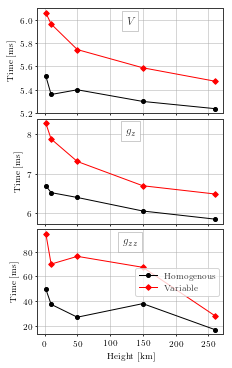

In [5]:
fields = 'potential gz gzz'.split()
fig, axes = plt.subplots(nrows=len(fields), ncols=1, sharex=True)
fig.set_size_inches((3.33, 6))
fig.subplots_adjust(hspace=0.05)
titles = r'$V$ $g_z$ $g_{zz}$'.split()

for field, ax, title in zip(fields, axes, titles):
    ax.plot(heights/1000, 1000*np.array(times_homogeneous[field]), 
            'o-', color='k', marker='o', label="Homogenous")
    ax.plot(heights/1000, 1000*np.array(times_variable[field]), 
            'o-', color='r', marker='D', label="Variable")
    ax.set_ylabel("Time [ms]")
    ax.text(0.5, 0.88, title, fontsize=11,
            horizontalalignment='center',
            verticalalignment='center',
            bbox={'facecolor': 'w',
                  'edgecolor': '#9b9b9b',
                  'linewidth': 0.5, 'pad': 5},
            transform=ax.transAxes)
    ax.grid(True, linewidth=0.5, color='#aeaeae')

plt.legend(loc=5)
plt.xlabel('Height [km]')
plt.show()